### Nim     : 231351011
### Nama    : Ahmad Rizki Sabani
### Kelas   : Pagi A

### Import Library

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

### Load Dataset

In [36]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Cholesterol Level,Blood Pressure,Smoking,Physical Activity,BMI,Heart Disease Risk
0,55,High,High,Yes,Low,Overweight,High
1,43,Normal,Normal,No,Moderate,Normal,Low
2,60,High,High,Yes,Low,Obese,High
3,35,Normal,Low,No,High,Normal,Low
4,50,High,High,No,Low,Overweight,Medium


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 30 non-null     int64 
 1   Cholesterol Level   30 non-null     object
 2   Blood Pressure      30 non-null     object
 3   Smoking             30 non-null     object
 4   Physical Activity   30 non-null     object
 5   BMI                 30 non-null     object
 6   Heart Disease Risk  30 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.8+ KB


### EDA

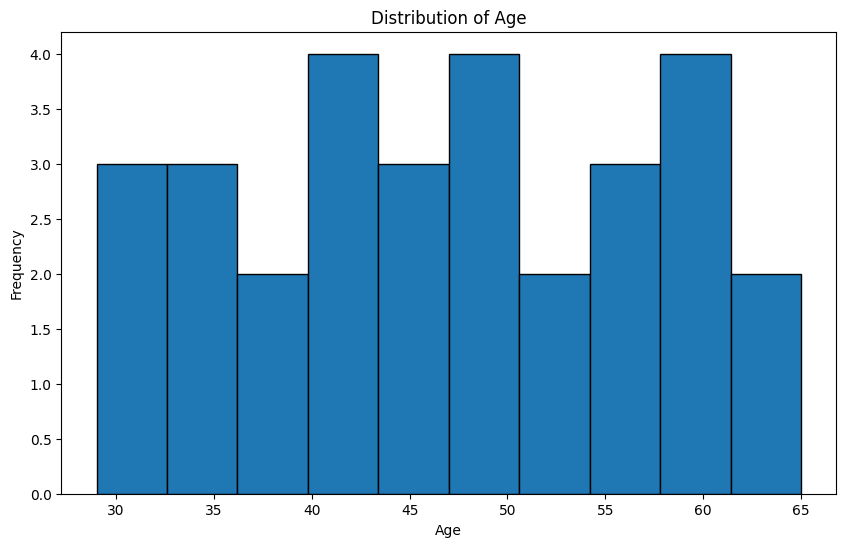

In [38]:
plt.figure(figsize=(10,6))
plt.hist(df['Age'], bins=10, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

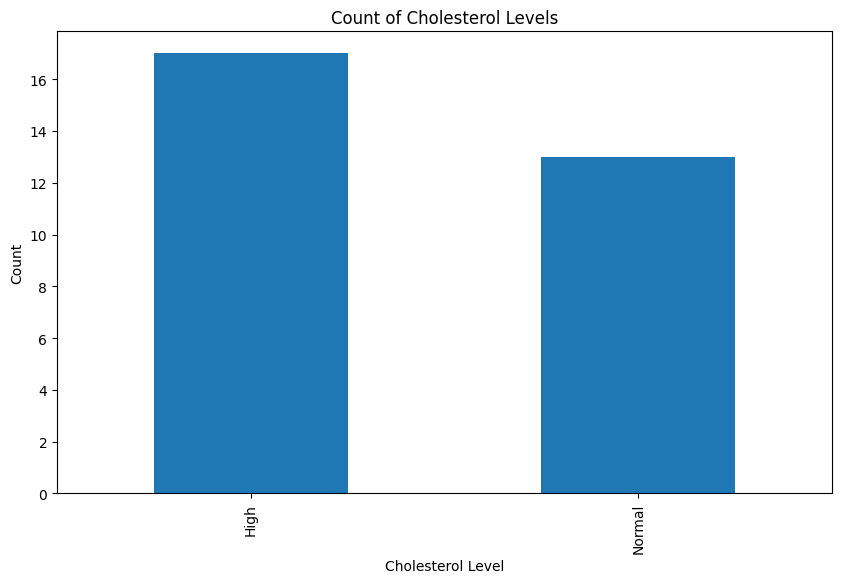

In [39]:
plt.figure(figsize=(10,6))
df['Cholesterol Level'].value_counts().plot(kind='bar')
plt.title("Count of Cholesterol Levels")
plt.xlabel("Cholesterol Level")
plt.ylabel("Count")
plt.show()

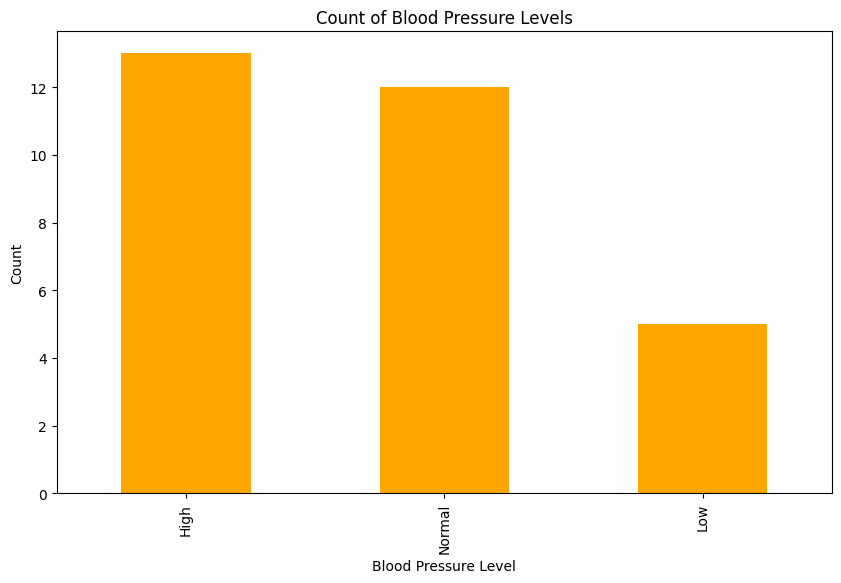

In [40]:
plt.figure(figsize=(10,6))
df['Blood Pressure'].value_counts().plot(kind='bar', color='orange')
plt.title("Count of Blood Pressure Levels")
plt.xlabel("Blood Pressure Level")
plt.ylabel("Count")
plt.show()

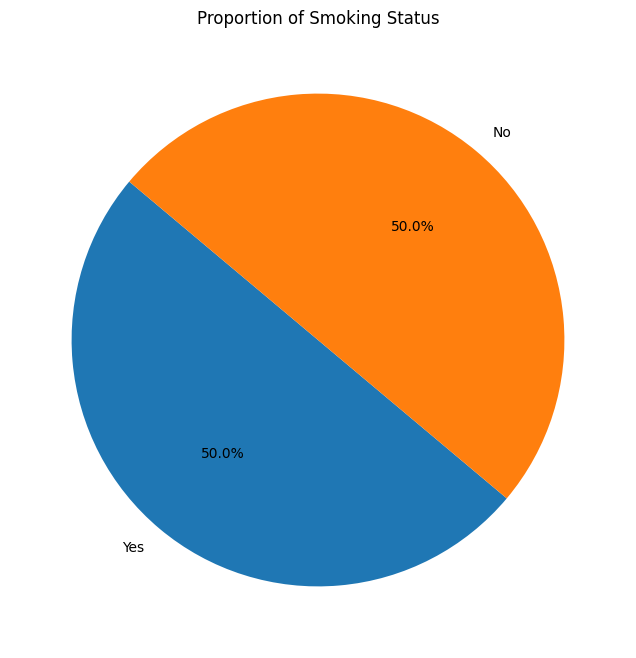

In [41]:
plt.figure(figsize=(8,8))
df['Smoking'].value_counts().plot(kind='pie', autopct='%1.1f%%',startangle=140)
plt.title("Proportion of Smoking Status")
plt.ylabel("")
plt.show()

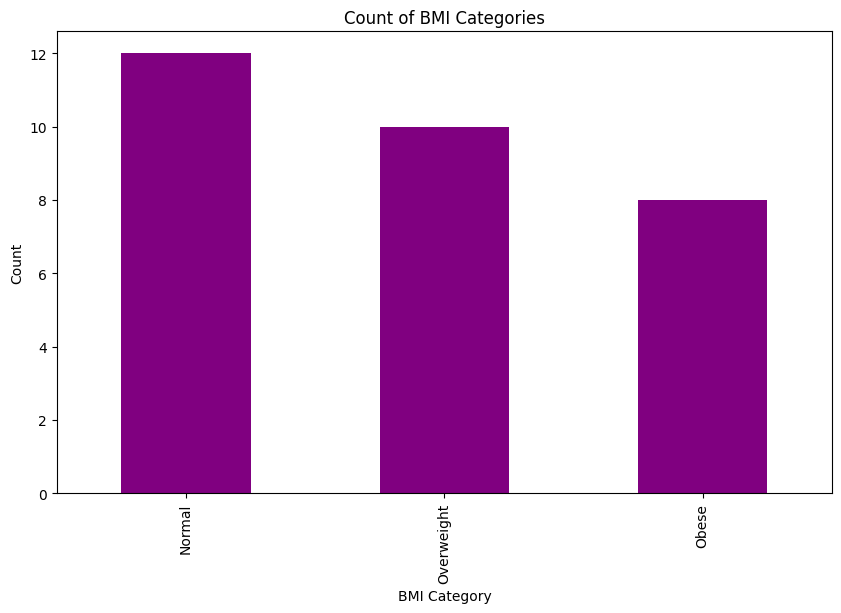

In [42]:
plt.figure(figsize=(10,6))
df['BMI'].value_counts().plot(kind='bar', color='purple')
plt.title("Count of BMI Categories")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.show()

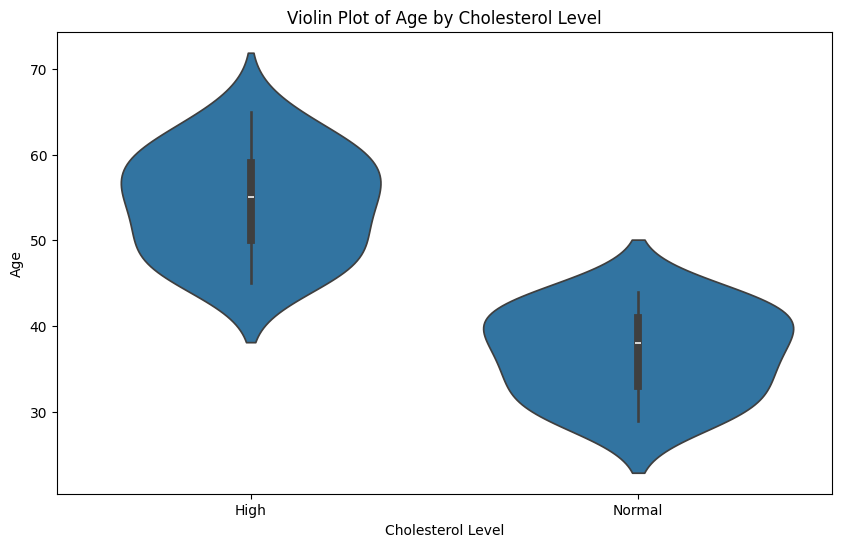

In [43]:
plt.figure(figsize=(10,6))
sns.violinplot(x= 'Cholesterol Level', y='Age', data = df)
plt.title("Violin Plot of Age by Cholesterol Level")
plt.xlabel("Cholesterol Level")
plt.ylabel('Age')
plt.show()

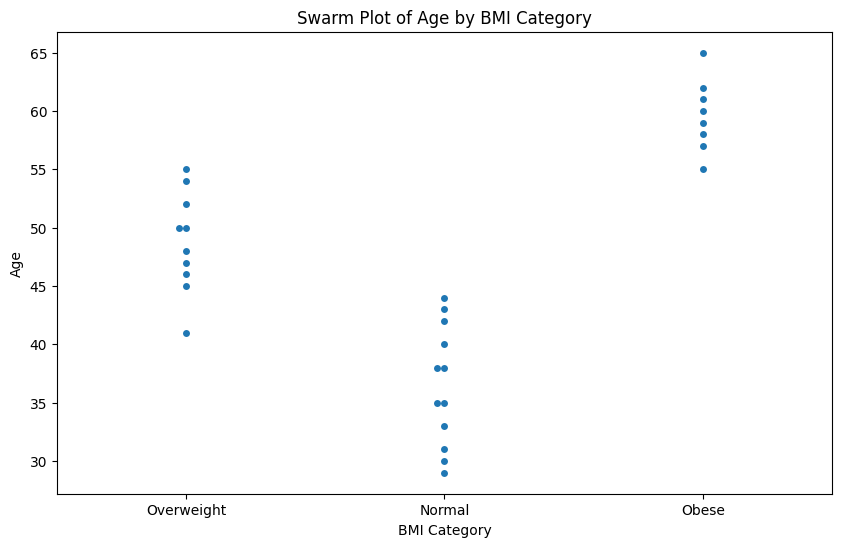

In [44]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='BMI', y='Age', data=df)
plt.title("Swarm Plot of Age by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel('Age')
plt.show()

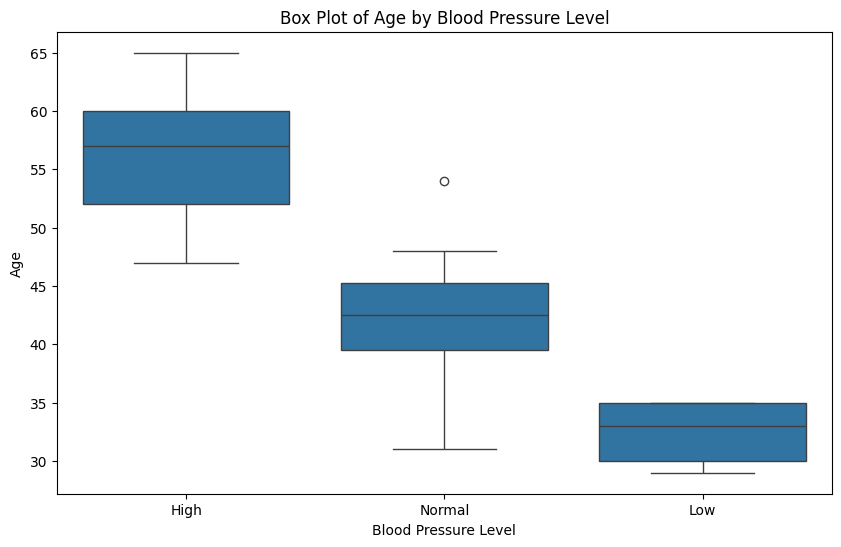

In [45]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Blood Pressure', y='Age', data=df)
plt.title("Box Plot of Age by Blood Pressure Level")
plt.xlabel("Blood Pressure Level")
plt.ylabel("Age")
plt.show()

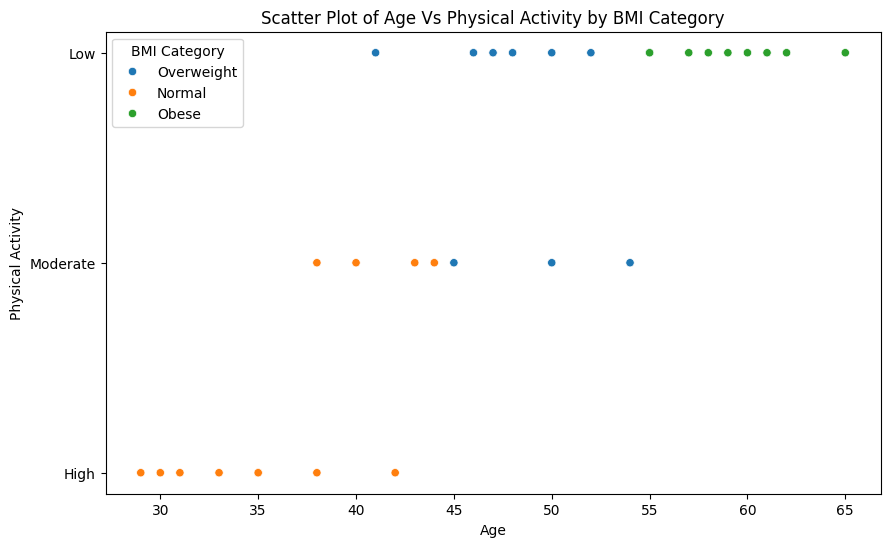

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Age', y='Physical Activity', hue='BMI')
plt.title("Scatter Plot of Age Vs Physical Activity by BMI Category")
plt.xlabel("Age")
plt.ylabel("Physical Activity")
plt.legend(title='BMI Category')
plt.show()

### Data Preprocessing

In [47]:
def categorize_age(age):
    if age < 35:
        return "Young"
    elif age < 55:
        return "Middle-aged"
    else:
        return "Senior"

In [48]:
df['Age'] = df['Age'].apply(categorize_age)

In [49]:
df.head()

,Age,Cholesterol Level,Blood Pressure,Smoking,Physical Activity,BMI,Heart Disease Risk
0,Senior,High,High,Yes,Low,Overweight,High
1,Middle-aged,Normal,Normal,No,Moderate,Normal,Low
2,Senior,High,High,Yes,Low,Obese,High
3,Middle-aged,Normal,Low,No,High,Normal,Low
4,Middle-aged,High,High,No,Low,Overweight,Medium


In [50]:
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [51]:
df.head()

,Age,Cholesterol Level,Blood Pressure,Smoking,Physical Activity,BMI,Heart Disease Risk
0,1,0,0,1,1,2,0
1,0,1,2,0,2,0,1
2,1,0,0,1,1,1,0
3,0,1,1,0,0,0,1
4,0,0,0,0,1,2,2


### Tentukan X dan Y

In [52]:
x = df.drop('Heart Disease Risk', axis=1)
y = df['Heart Disease Risk']

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

### Masukan Algoritma

In [54]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [55]:
y_pred = model.predict(x_test)

### Simulasi 

In [56]:
new_data = pd.DataFrame({
    'Age' : [label_encoders['Age'].transform(['Middle-aged'])[0]],
    'Cholesterol Level' : [label_encoders['Cholesterol Level'].transform(['High'])[0]],
    'Blood Pressure': [label_encoders['Blood Pressure'].transform(['High'])[0]],
    'Smoking':[label_encoders['Smoking'].transform(['Yes'])[0]],
    'Physical Activity' : [label_encoders['Physical Activity'].transform(['Low'])[0]],
    'BMI' : [label_encoders['BMI'].transform(['Overweight'])[0]]
})

In [57]:
new_prediction = model.predict(new_data)

In [58]:
new_prediction_decoded = label_encoders['Heart Disease Risk'].inverse_transform(new_prediction)

In [59]:
new_prediction_decoded

array(['High'], dtype=object)

### Akurasi 

In [60]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)

In [61]:
accuracy, conf_matrix

(1.0,
 array([[3, 0, 0],
        [0, 5, 0],
        [0, 0, 1]]))

### Plot Hasil Decision Tree

[Text(0.5, 0.9, 'BMI <= 0.5\nentropy = 1.575\nsamples = 21\nvalue = [8, 6, 7]\nclass = High Risk'),
 Text(0.25, 0.7, 'Smoking <= 0.5\nentropy = 0.592\nsamples = 7\nvalue = [0, 6, 1]\nclass = Low Risk'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6, 0]\nclass = Low Risk'),
 Text(0.375, 0.5, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Medium Risk'),
 Text(0.75, 0.7, 'Age <= 0.5\nentropy = 0.985\nsamples = 14\nvalue = [8, 0, 6]\nclass = High Risk'),
 Text(0.625, 0.8, '  False'),
 Text(0.625, 0.5, 'Blood Pressure <= 1.0\nentropy = 0.592\nsamples = 7\nvalue = [1, 0, 6]\nclass = Medium Risk'),
 Text(0.5, 0.3, 'Smoking <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 0, 2]\nclass = Medium Risk'),
 Text(0.375, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = Medium Risk'),
 Text(0.625, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = High Risk'),
 Text(0.75, 0.3, 'entropy = 0.0\nsamples = 4\nvalue = [0, 0, 4]\ncl

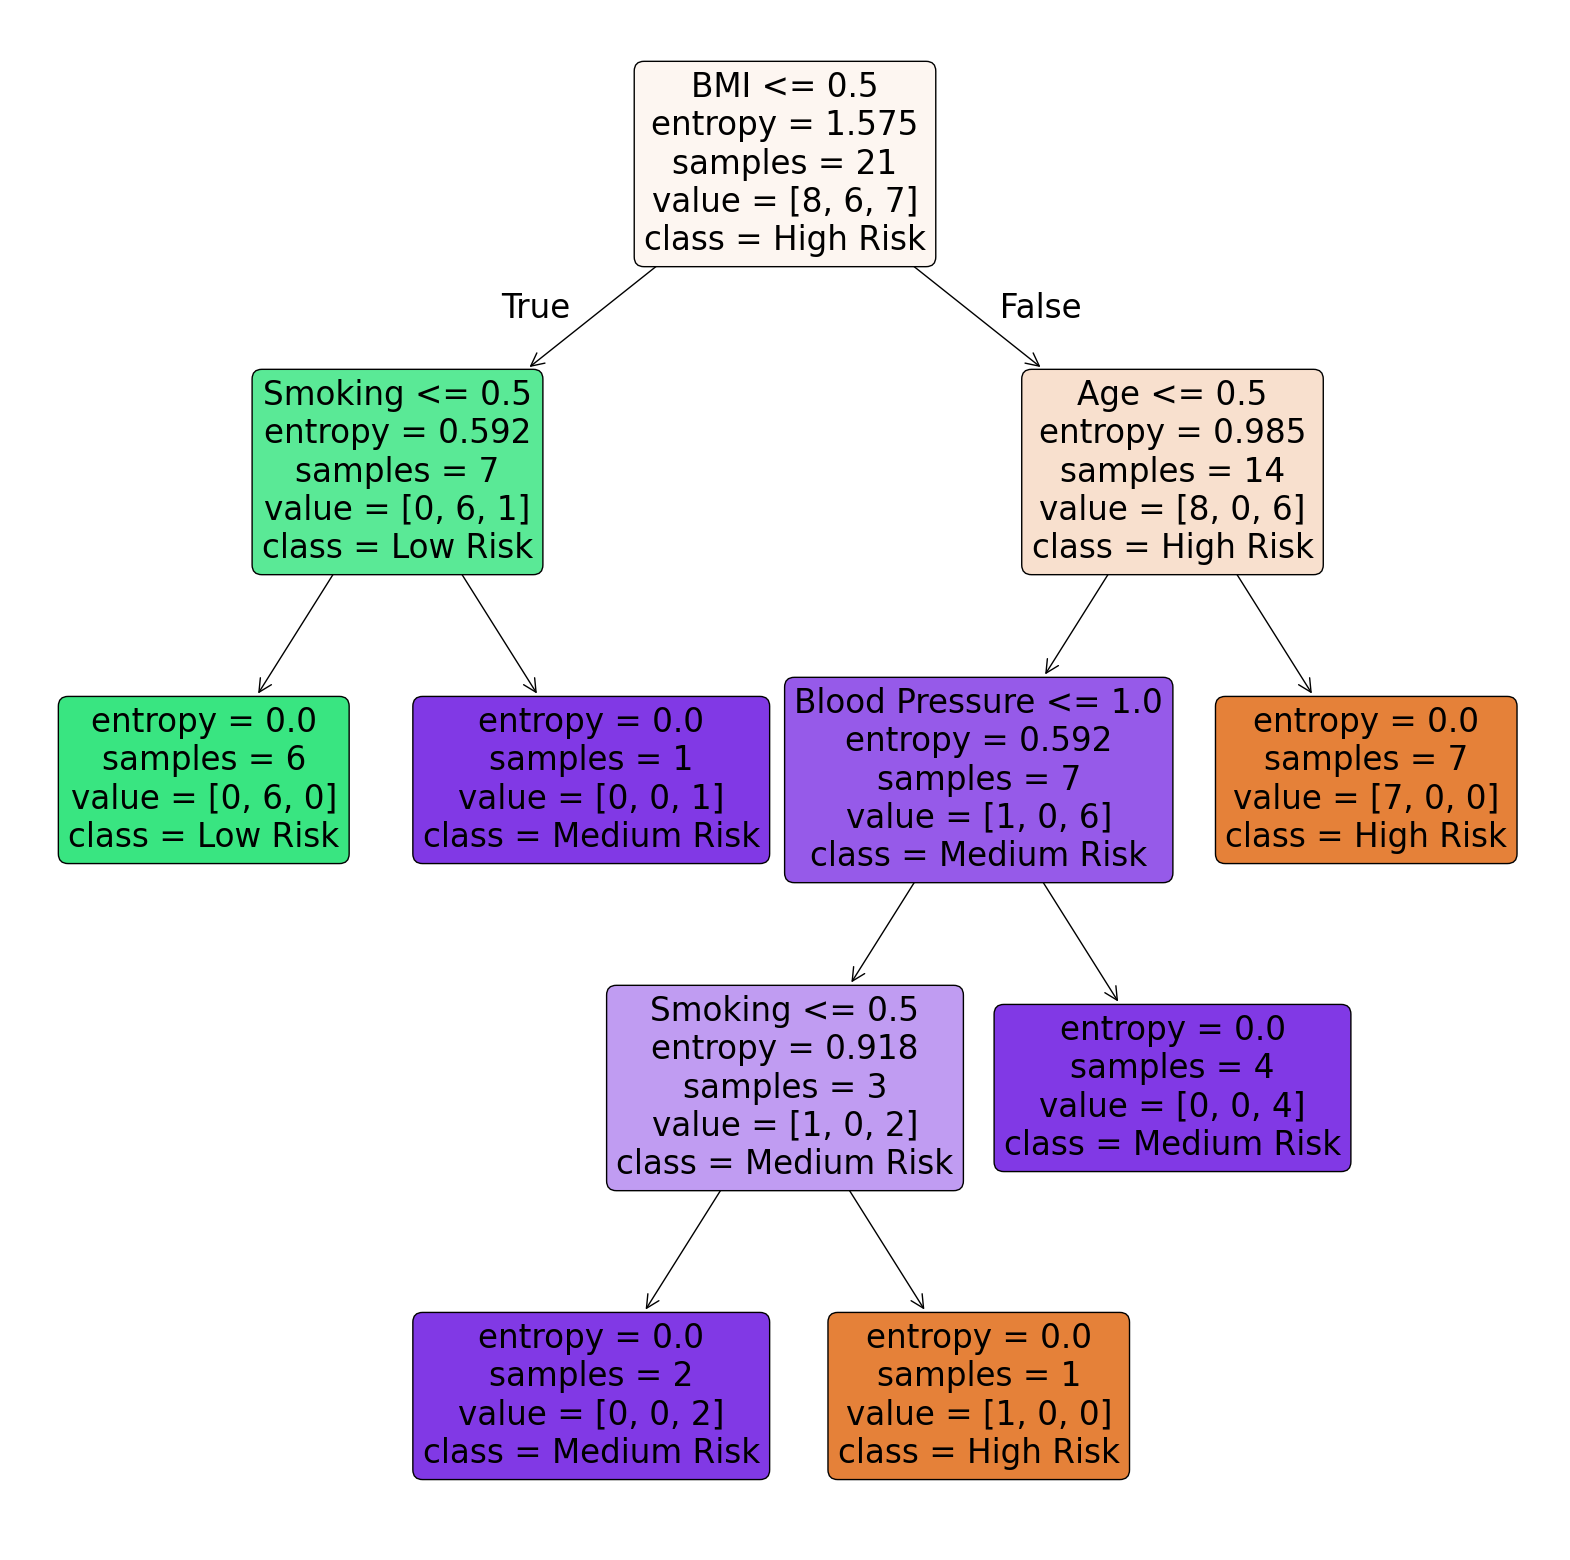

In [62]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
plot_tree(model, feature_names=['Age',
                                'Cholesterol Level',
                                'Blood Pressure',
                                'Smoking',
                                'Physical Activity',
                                'BMI'], class_names=['High Risk',
                                                     'Low Risk',
                                                     'Medium Risk'],
                                                     filled=True, rounded=True)